<a href="https://colab.research.google.com/github/seshadwi/PCVK_Genap_2022/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

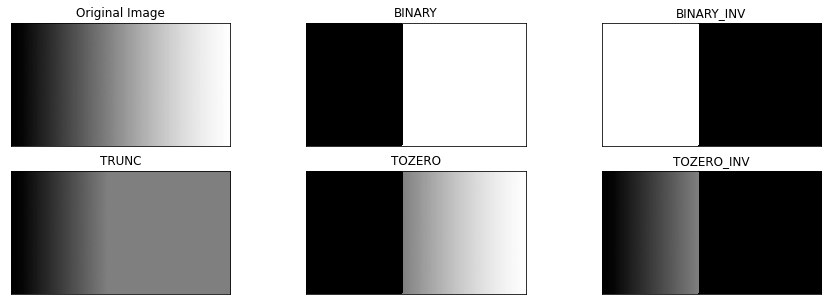

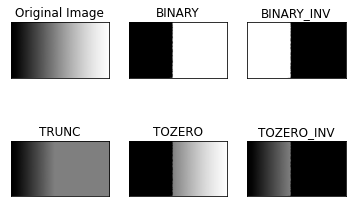

In [3]:
# nomer 3
# tanpa menggunakan library
filename_1 = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 127    #nilai Threshold yang ditentukan

#1. Original Image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0

#2. Binary threshold inverse
thresh2 = 255 - thresh1           
#3. Threshold Truncate
thresh3[img_g>thresh] = thresh
#4. Threshold Tozero
thresh4[img_g<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# menggunakan library
img_g = cv2.imread(filename_1)
ret,thresh1 = cv2.threshold(img_g,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_g,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_g,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_g,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_g,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

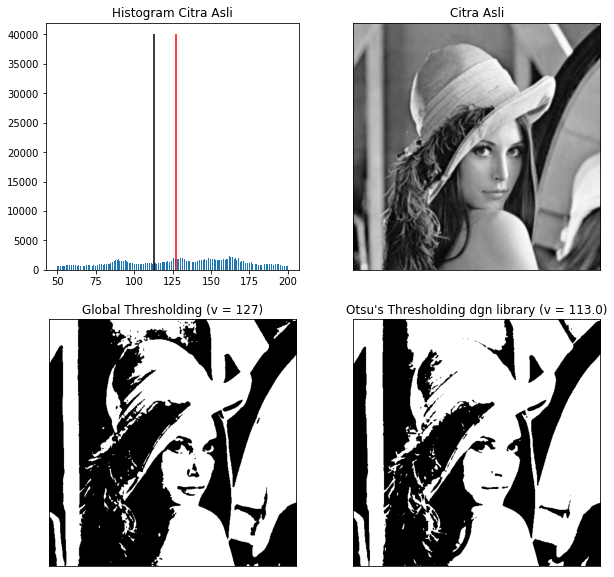

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


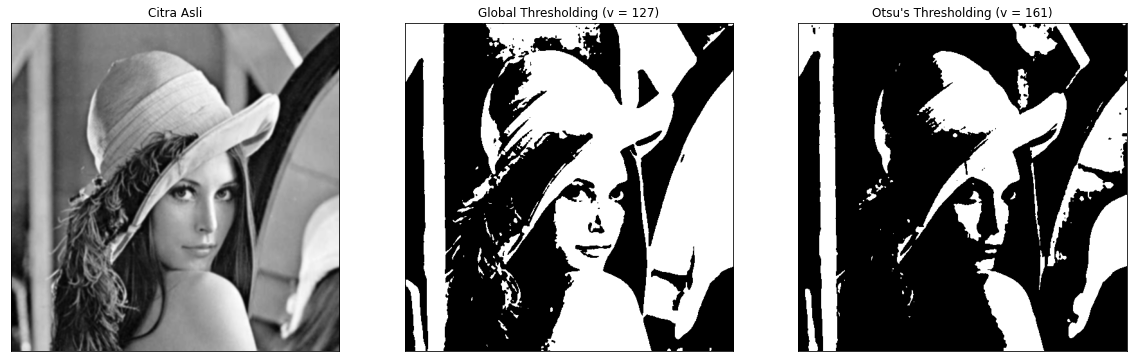

In [4]:
# nomer 4
# menggunakan library
filename_2 = ('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img_lgs = cv2.imread(filename_2, 0)
blur = cv2.GaussianBlur(img_lgs,(5,5),0)
thresh = 127

ret,th1 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])

plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')

for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# tanpa menggunakan library
img_lgs = cv2.imread(filename_2, 0)
blur = cv2.GaussianBlur(img_lgs, (5,5),0)
hist = cv2.calcHist([blur],[0],None,[256], [0,256])

hist_norm = hist.ravel()/hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1

for i in range(0,255):
  wb += hist[i]
  wf = (img_lgs.shape[0]*img_lgs.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)

  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i

x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

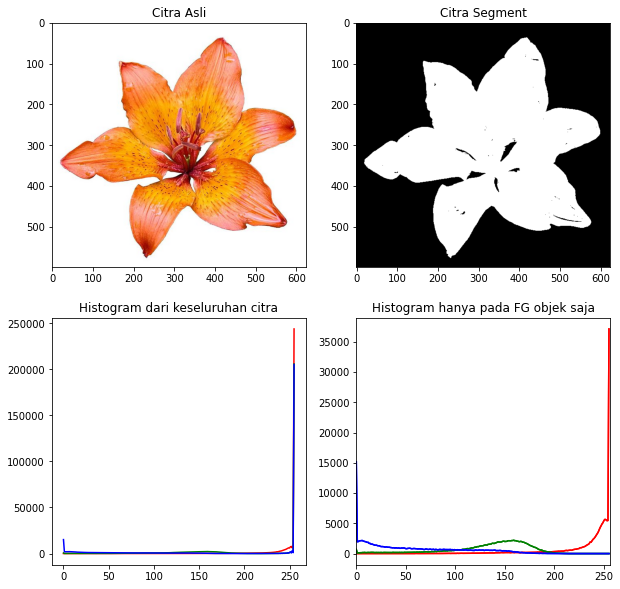

In [5]:
# nomer 5
filename_3 = ('/content/drive/MyDrive/PCVK/Images/lily.jpg')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f54c24379d0>,
 <matplotlib.image.AxesImage at 0x7f54c24049d0>)

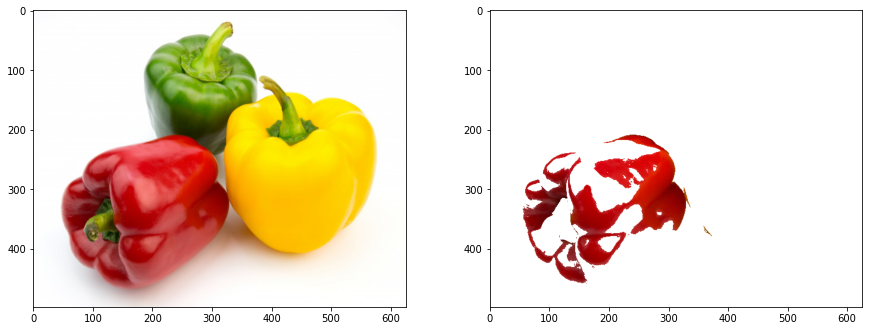

In [6]:
# nomer 6
filename_4 = ('/content/drive/MyDrive/PCVK/Images/peppers.jpg')
img_p = cv2.imread(filename_4) 
img_rgb2 = cv2.cvtColor(img_p,cv2.COLOR_BGR2RGB)

pixel_values = img_rgb2.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)

# syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100 atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) <0.2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). Untuk percobaan ini kita akan gunakan 3 cluster untuk image ini

k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# konversi titik centroid ke dalam integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

masked_image = np.copy(img_rgb2)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_rgb2.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_rgb2)
plt.subplot(2,2,2),plt.imshow(masked_image0)

# Soal: Saat anda menampilkan warna tertentu, jelaskan kendala yang dihadapi dan mengapa hal itu terjadi.
# Jawab: Kendala yang dihadapi adalah warna yang didapat random (acak) berdasarkan cluster terdekat.

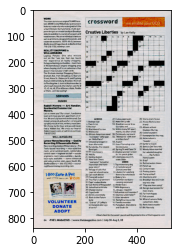

In [7]:
# nomer 7
img_c = cv2.imread('/content/drive/MyDrive/PCVK/Images/crossword.jpg')
img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 125, 255, cv2.THRESH_TOZERO)

plt.imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()